In [50]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler


df = pd.read_csv('sms.xls')
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:

df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df.shape


(5572, 2)

In [53]:
df.columns

Index(['label', 'sms_message'], dtype='object')

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    df['sms_message'],
    df['label'],
    test_size=0.25,
    random_state=1
)

print(f'Total messages: {len(df)}')
print(f'Training set: {len(X_train)}')
print(f'Test set: {len(X_test)}')

Total messages: 5572
Training set: 4179
Test set: 1393


In [55]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

ros = RandomOverSampler(random_state=1)
X_train_bal, y_train_bal = ros.fit_resample(X_train_vectorized, y_train)

In [56]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(X_test_vectorized)


In [57]:
results_df = pd.DataFrame({
    'Message': X_test,
    'Actual': y_test,
    'Predicted': predictions
})


predicted_spam = results_df[results_df['Predicted'] == 1]
predicted_ham = results_df[results_df['Predicted'] == 0]

print("\n Predicted as SPAM:")
print(predicted_spam.head(10))

print("\n Predicted as HAM:")
print(predicted_ham.head(10))


 Predicted as SPAM:
                                                Message  Actual  Predicted
147   FreeMsg Why haven't you replied to my text? I'...       1          1
4517  Congrats! 2 mobile 3G Videophones R yours. cal...       1          1
574                              Waiting for your call.       0          1
3316  FREE MESSAGE Activate your 500 FREE Text Messa...       1          1
1929  Call from 08702490080 - tells u 2 call 0906635...       1          1
1745  Someone has conacted our dating service and en...       1          1
5189  ree entry in 2 a weekly comp for a chance to w...       1          1
1573  Ur cash-balance is currently 500 pounds - to m...       1          1
5567  This is the 2nd time we have tried 2 contact u...       1          1
3375                            Also andros ice etc etc       0          1

 Predicted as HAM:
                                                Message  Actual  Predicted
1078                       Yep, by the pretty sculpture    

/tmp/ipython-input-3996464151.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=class_counts.values, palette='viridis')


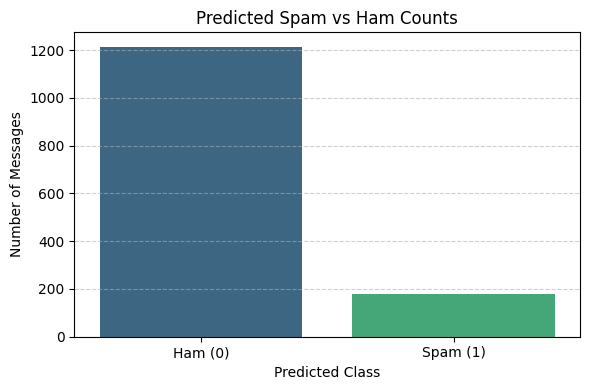

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns


class_counts = results_df['Predicted'].value_counts().sort_index()


labels = ['Ham (0)', 'Spam (1)']

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=class_counts.values, palette='viridis')
plt.title('Predicted Spam vs Ham Counts')
plt.ylabel('Number of Messages')
plt.xlabel('Predicted Class')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

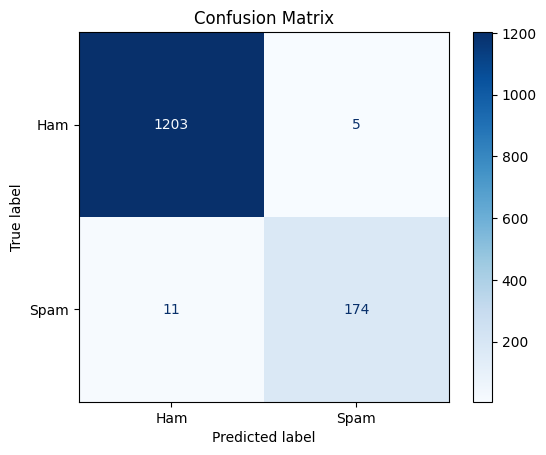

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test_vectorized, y_test, display_labels=['Ham', 'Spam'], cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [60]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions, target_names=['Ham', 'Spam'])
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99      1208
        Spam       0.97      0.94      0.96       185

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [61]:

print('Evaluation Metrics:\n')
print(f'Accuracy:  {accuracy_score(y_test, predictions):.4f}')
print(f'Precision: {precision_score(y_test, predictions):.4f}')
print(f'Recall:    {recall_score(y_test, predictions):.4f}')
print(f'F1 Score:  {f1_score(y_test, predictions):.4f}')


Evaluation Metrics:

Accuracy:  0.9885
Precision: 0.9721
Recall:    0.9405
F1 Score:  0.9560
